In [70]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

In [71]:
data=pd.read_csv("Admission_Predict.csv")

In [72]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [73]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [74]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [75]:
data['Chance of Admit ']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [76]:
data = data.drop(columns='Serial No.')
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [77]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [78]:
y=[1 if each>0.85 else 0 for each in data['Chance of Admit ']]
y

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [79]:
x=data.iloc[:,:-1]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [81]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
250,320,104,3,3.0,2.5,8.57,1
63,315,107,2,4.0,3.0,8.50,1
312,311,107,4,4.5,4.5,9.00,1
159,297,100,1,1.5,2.0,7.90,0
283,321,111,3,2.5,3.0,8.90,1
...,...,...,...,...,...,...,...
323,305,102,2,2.0,2.5,8.18,0
192,322,114,5,4.5,4.0,8.94,1
117,290,104,4,2.0,2.5,7.46,0
47,339,119,5,4.5,4.0,9.70,0


In [82]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,309,105,5,3.5,3.5,8.56,0
309,308,110,4,3.5,3.0,8.60,0
341,326,110,3,3.5,3.5,8.76,1
196,306,105,2,3.0,2.5,8.26,0
246,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...
146,315,105,3,2.0,2.5,8.48,0
135,314,109,4,3.5,4.0,8.77,1
390,314,102,2,2.0,2.5,8.24,0
264,325,110,2,3.0,2.5,8.76,1


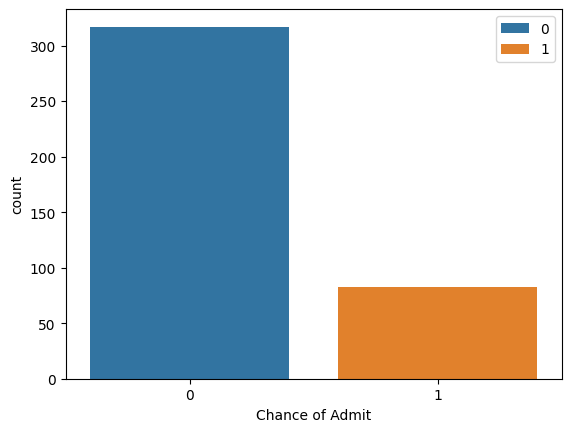

In [83]:
sns.countplot(x=y,hue=y)
plt.xlabel('Chance of Admit')
plt.show()

In [84]:
y

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [85]:
model=DecisionTreeClassifier().fit(x_train,y_train)

In [86]:
model

DecisionTreeClassifier()

In [87]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

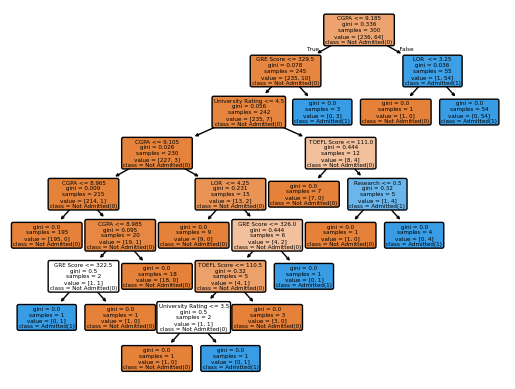

<Figure size 1600x1600 with 0 Axes>

In [93]:
tree.plot_tree(model,filled=True,feature_names= x_train.columns,class_names=['Not Admitted(0)','Admitted(1)'],rounded=True)
plt.figure(figsize=(16,16))
plt.show()

In [94]:
for i in range(len(y_predict)):
    pred=model.predict(x_test.iloc[[i]])
    if(pred<1):
        print("Not Admitted")
    else:
        print("Admitted")

Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted

In [90]:

print(model.predict([[314,109,4,3.5,4.0,8.77,1]]))
op=model.predict([[314,109,4,3.5,4.0,8.77,1]])
if op==1:
    print("Admitted")
else:
    print("Not admitted")

[0]
Not admitted


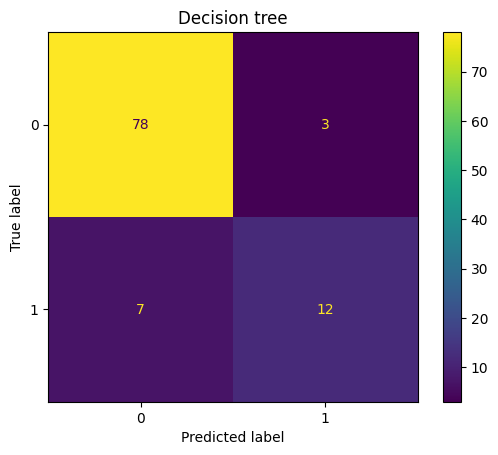

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)
plt.title('Decision tree')
plt.show()

In [96]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        81
           1       0.80      0.63      0.71        19

    accuracy                           0.90       100
   macro avg       0.86      0.80      0.82       100
weighted avg       0.90      0.90      0.90       100



In [97]:
accuracy_score(y_test,y_predict)

0.9

In [98]:
A=x.iloc[[399]]
A

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
399,333,117,4,5.0,4.0,9.66,1


In [101]:
A_predict=model.predict(A)
if(A_predict<1):
    print("Not Admitted")
else:
    print("Admitted")

Admitted


In [104]:
model_gini=DecisionTreeClassifier(criterion='gini').fit(x_train,y_train)
model_gini

DecisionTreeClassifier()

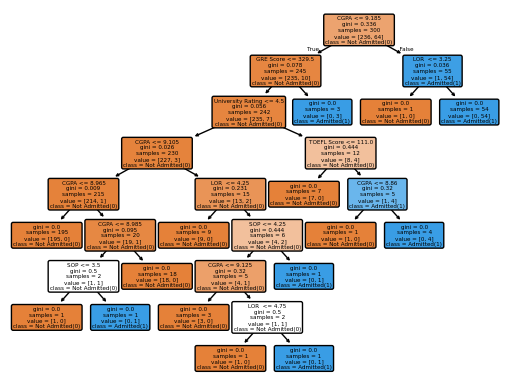

In [110]:
tree.plot_tree(model_gini,filled=True,feature_names=x_train.columns,class_names=['Not Admitted(0)','Admitted(1)'],rounded=True)
plt.show()             

In [111]:
y_pred=model_gini.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [113]:
for i in range(len(y_pred)):
    p=model_gini.predict(x_test.iloc[[i]])
    if(p<1):
        print("Not Admitted")
    else:
        print("Admitted")


Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted
Not Admitted
Admitted
Not Admitted
Not Admitted

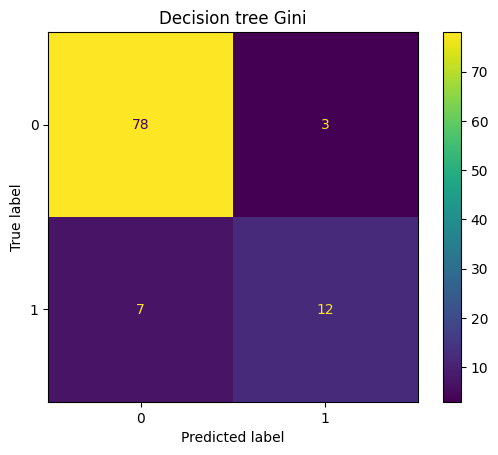

In [114]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Decision tree Gini')
plt.show()

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        81
           1       0.80      0.63      0.71        19

    accuracy                           0.90       100
   macro avg       0.86      0.80      0.82       100
weighted avg       0.90      0.90      0.90       100



In [116]:
accuracy_score(y_test,y_pred)

0.9

In [117]:
s=x.iloc[[150]]
s

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
150,334,114,4,4.0,4.0,9.43,1


In [118]:
B=model_gini.predict(s)
if(B<1):
    print('Not Admitted')
else:
    print('Admitted')

Admitted
